<a href="https://colab.research.google.com/github/dc3347/CompAspectsofRobotics/blob/main/Robotics_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import random
from matplotlib.patches import Patch

In [2]:
# helper method that returns neighbors of a node

def neighbors(x,y, input):
  neighbors=[]

  if y==0: #left column
    if x==0: #top left corner
      neighbors=[(x+1,y+1),(x,y+1),(x+1,y)]
    elif x==input.shape[0]-1: #bottom left corner
      neighbors=[(x-1,y),(x-1,y+1),(x,y+1)]
    else: #left edge, y==0 and x>=1 and x<input.shape[0]-1
      neighbors=[(x-1,y),(x+1,y),(x-1,y+1),(x+1,y+1),(x,y+1)]
    return neighbors
  elif y==input.shape[1]-1: #right column
    if x==0: #top right corner
      neighbors=[(x+1,y),(x+1,y-1),(x,y-1)]
    elif x==input.shape[0]-1: #bottom right corner
      neighbors=[(x-1,y),(x-1,y-1),(x,y-1)]
    else: #right edge, x>=1 and x<input.shape[0]-1 and y==input.shape[1]-1
      neighbors=[(x-1,y),(x+1,y),(x-1,y-1),(x,y-1),(x+1,y-1)]
    return neighbors
  elif y>=1 and y<input.shape[1]-1 and x==0: #top edge
    neighbors=[(x+1,y-1),(x+1,y),(x+1,y+1),(x,y-1),(x,y+1)]
  elif y>=1 and y<input.shape[1]-1 and x==input.shape[0]-1: #bottom edge
    neighbors=[(x-1,y-1),(x-1,y),(x-1,y+1),(x,y-1),(x,y+1)]
  else:
    neighbors=[(x+1, y), (x-1,y), (x,y+1), (x,y-1), (x-1,y-1), (x+1, y+1), (x-1, y+1), (x+1, y-1)]
  return neighbors


array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 2., 2., ..., 2., 2., 1.],
       [1., 2., 3., ..., 3., 2., 1.],
       ...,
       [1., 2., 3., ..., 3., 2., 1.],
       [1., 2., 2., ..., 2., 2., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

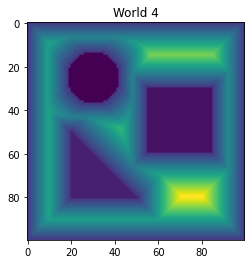

In [3]:
#try 3 for 4.1
def brushfire(inp):
  input = np.copy(inp)

  #preprocess the data to include list of points where the obstacles exist
  wave = []
  w=[]
  for i in range(len(input)):
    for j in range(len(input[i])):
      if input[i][j]<0: # obstacle
        w.append((i,j)) # add obstacles' coordinates to wavefront

  for elem in w:
    for n in neighbors(elem[0],elem[1], input):
      if input[n[0]][n[1]]==0:
        wave.append((n[0],n[1]))
        input[n[0]][n[1]]=1

  # add edges at top and bottom of grid
  for j in range(len(input[0])):
    wave.append((0,j))
    wave.append((len(input)-1,j))
    if input[0][j] == 0:
      input[0][j]=1
    if input[len(input)-1][j] == 0:
      input[len(input)-1][j]=1

  # add edges at left and right of grid
  for i in range(1,len(input)-1):
    wave.append((i, 0))
    wave.append((i, len(input[0])-1))
    if input[i][0]==0:
      input[i][0]=1
    if input[i][len(input[0])-1] == 0:
      input[i][len(input[0])-1]=1
  
  # iterate through obstacle boundary, for all the pts on the boundary, advance 1 forward
  while wave:
    c = wave.pop(0)
    n = neighbors(c[0],c[1], input) # list of c's neighbors

    for elem in n:
      if input[elem[0]][elem[1]]==0:
        wave.append((elem[0],elem[1])) #append all neighbors of c with value 0 to end of queue
        input[elem[0]][elem[1]]=input[c[0]][c[1]]+1
  

  #np.savetxt('brushfire_world1.txt',input)
  matplotlib.pyplot.title('World 4')
  matplotlib.pyplot.imshow(input)
  return input

# display brushfire
brushfire(np.loadtxt("/content/world4.txt"))



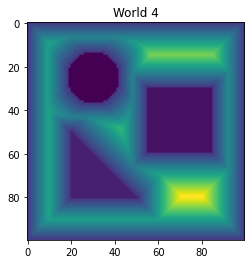

In [4]:
# try 2 for 4.2
def GVD(inp):
  input = np.copy(inp)
  pointer = np.copy(inp) # stores which obstacle each cell originates from

  GVD = [] # will be a list of tuples
  #preprocess the data to include list of points where the obstacles exist
  wave = []
  w=[]

  for i in range(len(input)):
    for j in range(len(input[i])):
      if input[i][j]<0: # obstacle
        w.append((i,j)) # add obstacles' coordinates to wavefront
        pointer[i][j]=input[i][j]

  for elem in w:
    for n in neighbors(elem[0],elem[1],input):
      if input[n[0]][n[1]]==0:
        wave.append((n[0],n[1]))
        pointer[n[0]][n[1]]=pointer[elem[0]][elem[1]]
        input[n[0]][n[1]]=1
        
  # add edges at top and bottom of grid
  for j in range(len(input[0])):
    wave.append((0,j))
    wave.append((len(input)-1,j))
    if input[0][j] == 0:
      input[0][j]=1
    if input[len(input)-1][j] == 0:
      input[len(input)-1][j]=1

  # add edges at left and right of grid
  for i in range(1,len(input)-1):
    wave.append((i, 0))
    wave.append((i, len(input[0])-1))
    if input[i][0]==0:
      input[i][0]=1
    if input[i][len(input[0])-1] == 0:
      input[i][len(input[0])-1]=1

  # add edges to pointer grid
  pointer[0,:] = 1 # top edge is "1"
  pointer[:,0] = 2 # left edge is "2"
  pointer[-1,:] = 3 # bottom edge is "3"
  pointer[:,-1] = 4 # right edge is "4"
  
  # iterate through obstacle boundary, for all the pts on the boundary, advance 1 forward
  while wave:
    c = wave.pop(0)
    n = neighbors(c[0],c[1],input) # list of c's neighbors
    
    for elem in n: 
      if input[elem[0]][elem[1]]==0:
        wave.append((elem[0],elem[1])) #append all neighbors of c with value 0 to end of queue
        input[elem[0]][elem[1]]=input[c[0]][c[1]]+1
        pointer[elem[0]][elem[1]]=pointer[c[0]][c[1]]
  
      elif input[elem[0]][elem[1]]>0: #has already been expanded
        # check if value of that pointer is diff from curr pointer
        if pointer[elem[0]][elem[1]] != pointer[c[0]][c[1]]:
          GVD.append((elem[0],elem[1])) # collision, add to GVD
  
  matplotlib.pyplot.title('World 4')
  matplotlib.pyplot.imshow(input)
  return GVD, input

# compile and run
gvd, input = GVD(np.loadtxt("/content/world4.txt"))


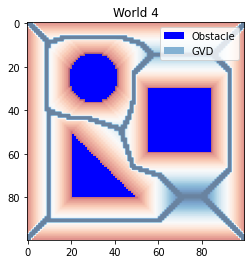

In [5]:
def plot_GVD(grid, GVD, path=None):
  fig, ax = plt.subplots()
  GVD_grid = np.copy(grid)
  GVD_x, GVD_y = zip(*GVD)
  GVD_grid[GVD_x,GVD_y] = 20

  img1 = ax.imshow(GVD_grid, cmap="RdBu", alpha=0.6)
  obstacles = GVD_grid.copy()
  obstacles[obstacles < 0] = -2.0
  masked_data = np.ma.masked_where(obstacles > 0, obstacles)
  img2 = ax.imshow(masked_data, cmap="bwr")
  legend_elements = [Patch(facecolor='blue', label='Obstacle'),
                     Patch(facecolor='#83b1d3', label='GVD')]

  if path:
    path_x, path_y = zip(*path)
    GVD_grid[path_x,path_y] = 40.0
    grid_path = GVD_grid.copy()
    grid_path = np.ma.masked_where(grid_path != 40.0, grid_path)
    img3 = ax.imshow(grid_path, cmap="cool_r", interpolation="nearest") 
    legend_elements.append(Patch(facecolor='#e741f6', label='path'))

  ax.legend(handles=legend_elements)
  matplotlib.pyplot.title('World 4')
  plt.show()
 
 
plot_GVD(input, gvd)



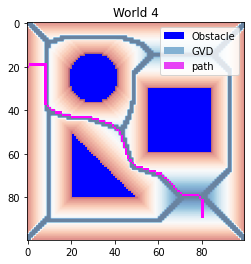

In [6]:
# try 1 part 4.3

def navigation(input, GVD, start, goal):
  path=[]
  # step 1
  # find a shortest path btw a given cell location and the closest GVD cell via gradient ascent

  start_to_GVD_start = []
  GVD_start_to_GVD_goal = []
  goal_to_GVD_goal = []

  s = start
  start_to_GVD_start.append(s)
  while s not in GVD and s != goal:
    n = neighbors(s[0],s[1], input)
    for elem in n:
      if input[elem[0]][elem[1]] == input[s[0]][s[1]]+1:
        start_to_GVD_start.append((elem[0],elem[1]))
        s = (elem[0],elem[1])
        continue
  if s == goal:
    return start_to_GVD_start

  # step 3: goal to GVD_goal
  g = goal
  while g not in GVD:
    k = neighbors(g[0],g[1],input)
    for elem in k:
      if input[elem[0]][elem[1]] == input[g[0]][g[1]]+1:
        goal_to_GVD_goal.append((elem[0],elem[1]))
        g = (elem[0], elem[1])
        continue

  # after these while loops, s = gvd_start, and g = gvd_goal
  gvd_start = s
  gvd_goal = g
  frontier = [(s[0],s[1])]
  visited=[]
  pointer= {}

  # step 2, s to g on GVD
  GVD_start_to_GVD_goal.append(gvd_goal) # start at the end and traverse backwards

  while frontier:
    f = frontier.pop(0) # pop frontier one by one until we pop off a goal node
    if f == gvd_goal:
      GVD_start_to_GVD_goal.append(f)
      break
    
    b = neighbors(f[0],f[1],input) # expand gvd_start get its neighbors
    # iterate through the neighbors of the node that is on the gvd. if those neighbors
    # are also on the gvd, add to frontier
    for elem in b:
      if elem in GVD and elem not in visited:
        frontier.append((elem[0], elem[1]))
        visited.append((elem[0], elem[1]))
        pointer[(elem[0], elem[1])]=(f[0],f[1]) # key=child; value=parent
    
  at_GVD_start = False
  parent = pointer[gvd_goal]
  GVD_start_to_GVD_goal.append(parent)
  while not at_GVD_start:
    if pointer[parent]==gvd_start:
      at_GVD_start = True
    GVD_start_to_GVD_goal.append((pointer[parent]))
    parent = pointer[parent]
  
  # concatenate the 3 paths together: start to GVD_start, GVD_start to GVD_goal, GVD_goal to goal
  path = start_to_GVD_start + GVD_start_to_GVD_goal[::-1] + goal_to_GVD_goal[::-1]
  return path

start = (20,0)
goal = (90,80)
path = navigation(input, gvd, start, goal)
plot_GVD(input, gvd, path)
